In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *


In [2]:
#import cosima_cookbook as cc

# Output data path

# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
infile='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/'
outfile='/g/data/v45/jm5970/trackeddy_out/'
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]


In [3]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.

ssh_mean=ssh_mean[400:600,500:1000]
#print(shape(eta),shape(ssh_mean))
lon=lon[500:1000]
lat=lat[400:600]

areamap=array([[0,len(lon)],[0,len(lat)]])

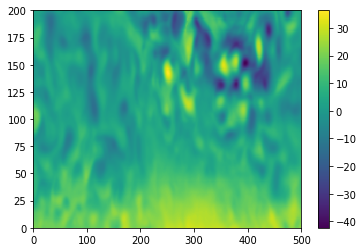

Pos
 0% [=========================================================================================>]100.0% Time Elapsed: 238.0 s  Neg
 0% [=========================================================================================>]100.0% Time Elapsed: 202.0 s  

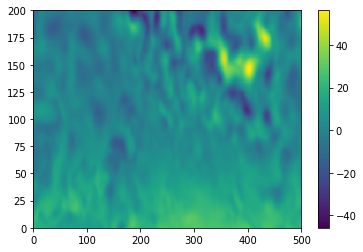

Pos
 0% [==========================================================================================>]100.0% Time Elapsed: 269.0 s  Neg
 0% [==========================================================================================>]100.0% Time Elapsed: 212.0 s  

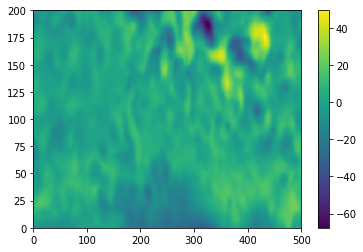

Pos
 0% [===========================================================================================>]100.0% Time Elapsed: 197.0 s  Neg
 0% [===========================================================================================>]100.0% Time Elapsed: 222.0 s  

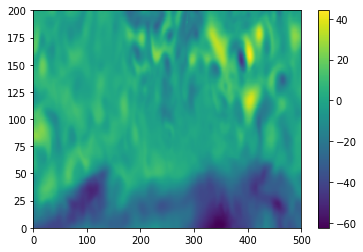

Pos
 0% [==============>]16.0% Time Elapsed: 21.0 s  

UnboundLocalError: local variable 'position_eddy' referenced before assignment

In [4]:
it=306
et=345

for tt in range(it,et):
    ncfile=Dataset(infile+'output'+str(tt)+'/rregionsouthern_ocean_daily_eta_t.nc')
    
    eta=ncfile.variables['eta_t'][:]*100
    eta=eta[:,400:600,500:1000]
    pcolormesh(eta[0,:,:]-ssh_mean)
    colorbar()
    show()
    mask=ma.getmask(eta[0,:,:])
    ssha=eta-ssh_mean
    print('Pos')
    eddytd=analyseddyzt(eta,lon,lat,0,shape(eta)[0],1,20,4,4,data_meant=ssh_mean,areamap=areamap,mask=''\
                        ,destdir='',physics='',diagnostics=False,pprint=False)
    print('Neg')
    eddytdn=analyseddyzt(eta,lon,lat,0,shape(eta)[0],1,-20,-4,-4,data_meant=ssh_mean,areamap=areamap,\
                         mask='',destdir='',physics='',diagnostics=False,pprint=False)
    
    save(outfile+str(tt)+'_pos.npy',eddytd)
    save(outfile+str(tt)+'_neg.npy',eddytdn)

In [ ]:
read_dictionary = np.load(outfile+str(tt)+'_pos.npy')

In [ ]:
ncfile


In [ ]:
eta=ncfile.variables['eta_t'][:]*100